In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)


In [141]:
#read data
df=pd.read_csv(r'movies.csv')

In [241]:
# data head
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [143]:
#look for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f'{col} , {percent_missing}%')
    
len(df)

name , 0.0%
rating , 0.010041731872717789%
genre , 0.0%
year , 0.0%
released , 0.0002608242044861763%
score , 0.0003912363067292645%
votes , 0.0003912363067292645%
director , 0.0%
writer , 0.0003912363067292645%
star , 0.00013041210224308815%
country , 0.0003912363067292645%
budget , 0.2831246739697444%
gross , 0.02464788732394366%
company , 0.002217005738132499%
runtime , 0.0005216484089723526%


7668

In [244]:
#clear missing data and create copy
df_cleared = df.dropna()

In [243]:
#check missing data
for col in df_cleared.columns:
    percent_missing = np.mean(df_cleared[col].isnull())
    print(f'{col} , {percent_missing}%')

len(df_cleared)

name , 0.0%
rating , 0.0%
genre , 0.0%
year , 0.0%
released , 0.0%
score , 0.0%
votes , 0.0%
director , 0.0%
writer , 0.0%
star , 0.0%
country , 0.0%
budget , 0.0%
gross , 0.0%
company , 0.0%
runtime , 0.0%


5421

In [245]:
#check data type
df_cleared.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [249]:
#csave copy and chage data type of copy
df_cleared.to_csv('movies_cleareds.csv', index=False)
df_clear = pd.read_csv(r'movies_cleareds.csv')

df_clear['votes']=df_clear['votes'].astype('int64')
df_clear['budget']=df_clear['budget'].astype('int64')
df_clear['gross']=df_clear['gross'].astype('int64')
df_clear['runtime']=df_clear['runtime'].astype('int64')                               



In [250]:
df_clear.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [251]:
#create correct release year
df_clear["correct_year"]=df_clear["released"].astype(str).str.split(',').str[1].str[1:5]


In [252]:
df_clear.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime           int64
correct_year     object
dtype: object

In [256]:
#del df_clear['year']
df_clear.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [261]:
#sort
df_clear = df_clear.sort_values(by=['gross'], inplace=False, ascending=False)

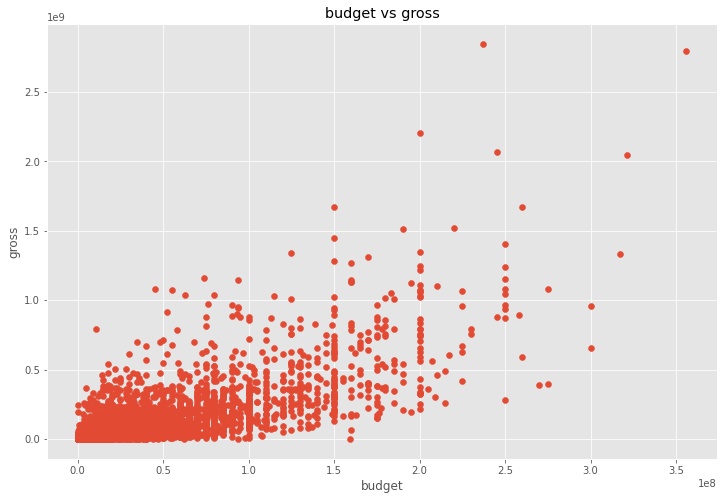

In [264]:
plt.scatter(x=df_clear["budget"],y=df_clear['gross'])
plt.title("budget vs gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.show()

In [263]:
df_clear

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
3731,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
1378,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
2286,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
154,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


<AxesSubplot:xlabel='budget', ylabel='gross'>

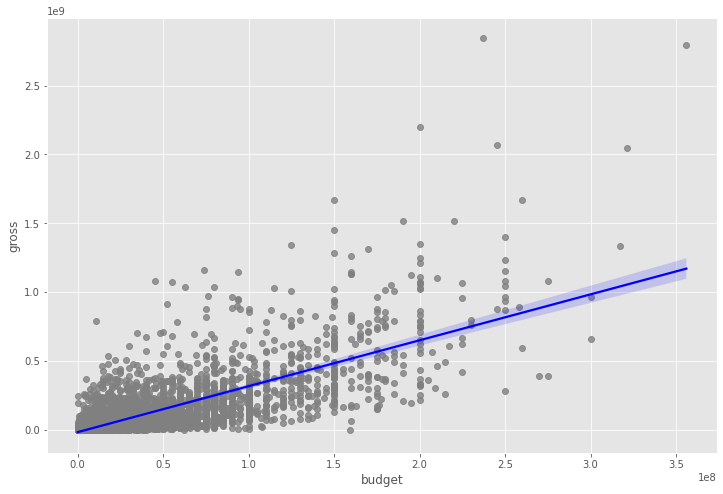

In [267]:
#plot budget vs ross using seaborn

sns.regplot(x="budget",y="gross", data=df_clear, scatter_kws={"color":"gray"}, line_kws={"color":"blue"})

In [271]:
# correletion pearson, kendall, spearman

df_clear.corr(method="pearson")

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


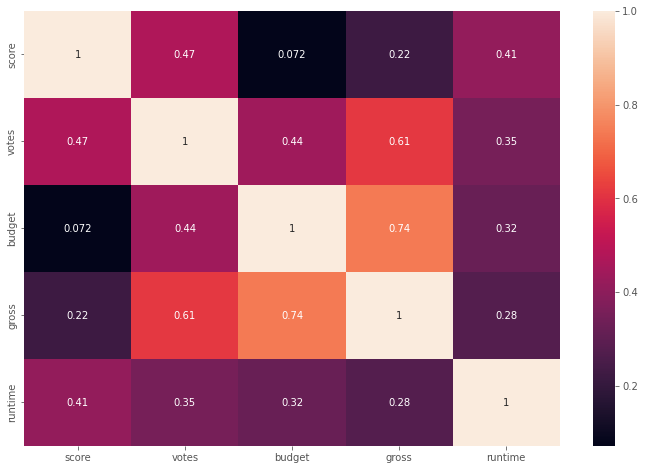

In [274]:
correlation_matrix=df_clear.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [293]:
df_clear_numerized=df_clear
for col_ in df_clear_numerized:
    if (df_clear_numerized[col_].dtype=="object"):
        df_clear_numerized[col_]= df_clear_numerized[col_].astype("category")
        df_clear_numerized[col_]= df_clear_numerized[col_].cat.codes
    
df_clear_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
3731,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
5302,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
1795,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
4730,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
5158,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3794,6,6,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,35
1378,2969,5,0,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,14
2286,1595,3,6,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,21
154,2909,6,9,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,2


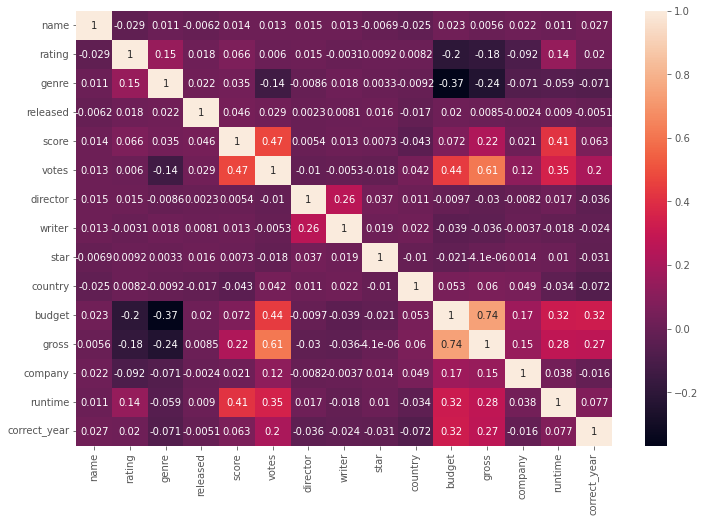

In [303]:
correlation_matrix2=df_clear_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix2, annot=True)
plt.show()

In [304]:
corr=df_clear_numerized.corr(method="pearson")
corr_pairs=corr.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              released       -0.006152
              score           0.014450
                                ...   
correct_year  budget          0.321624
              gross           0.269479
              company        -0.015587
              runtime         0.076666
              correct_year    1.000000
Length: 225, dtype: float64

In [305]:
sorted_corr= corr_pairs.sort_values()
sorted_corr

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
                                ...   
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 225, dtype: float64

In [309]:
result= sorted_corr[(sorted_corr)>0.5]
result

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

gross and budget have highest correlation